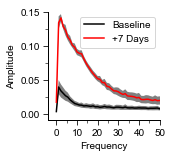

In [1]:
%matplotlib inline
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sci
from matplotlib.ticker import AutoMinorLocator

minor_locator = AutoMinorLocator(2)
minor_locatorx = AutoMinorLocator(2)

plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 10})
plt.rcParams['savefig.bbox'] = 'tight'

mat = sci.loadmat('fft.mat')
minor_locator = AutoMinorLocator(2)
minor_locatorx = AutoMinorLocator(2)

bar_input = mat['bar_input']
ebars = mat['ebars']

x = np.linspace(0, 250, 226) #Frequency spacing 
y1 = bar_input[0:50,0]
error1 = ebars[0:50,0]
y2 = bar_input[0:50,6]
error2 = ebars[0:50,6]
x = x[0:50]

ax = plt.subplot()
ax.plot(x, y1,'k', label = 'Baseline')
ax.plot(x,y2,'r', label = '+7 Days')
plt.fill_between(x, y1-error1, y1+error1,facecolor='0.5')
plt.fill_between(x, y2-error2, y2+error2,facecolor='0.5')
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency')
plt.axis([-4, 50, -0.01, 0.15])
plt.yticks([0,0.05,0.1,0.15])
plt.xticks([0,10,20,30,40,50])
ax.yaxis.set_minor_locator(minor_locator)
ax.xaxis.set_minor_locator(minor_locatorx)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
fig = plt.gcf()
fig.set_size_inches(2,2)
ax.legend()

plt.show()

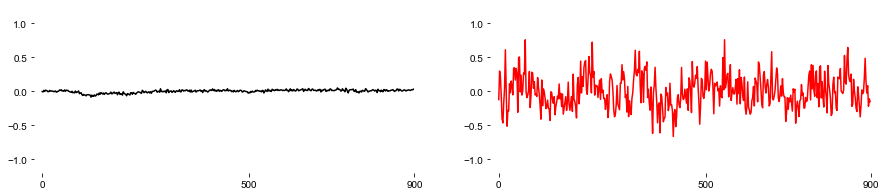

In [2]:
mat = sci.loadmat('emx-M2trace.mat')

bar_input = mat['bar_input']

x = np.arange(0,900,2)

f, ax = plt.subplots(1,2, figsize=(15,3))

ax[0].plot(x,bar_input[0:450,3,0], 'k')
ax[0].set_ylim(-1.2,1.2)
ax[0].set_xlim(-20,900)
ax[0].set_xticks([0,500,900])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].plot(x,bar_input[0:450,6,3], 'r')
ax[1].set_ylim(-1.2,1.2)
ax[1].set_xlim(-20,900)
ax[1].set_xticks([0,500,900])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
    
plt.show()


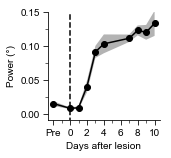

In [3]:
mat = sci.loadmat('EMX-FFT.mat')

bar_input = mat['av']
x = [-2,0,1,2,3,4,7,8,9,10]
y = bar_input[:,0]
error = bar_input[:,1]

fig, bax = plt.subplots()
bax.plot(x, y,color='k')
bax.plot(x, y,'ko')
bax.fill_between(x, y-error, y+error,facecolor='0.7')
minor_locatorx = AutoMinorLocator(2)
minor_locatory = AutoMinorLocator(2)
bax.vlines(0,-0.05,0.2,color = 'k', linestyles = 'dashed')
bax.set_ylabel('Power (\xb0)')
bax.set_xlabel('Days after lesion')
bax.set_ylim(-0.01,0.15)
plt.xticks([-2,0,2,4,6,8,10],('Pre','0','2','4','6','8','10'))
plt.yticks([0,0.05,0.1,0.15])
bax.yaxis.set_minor_locator(minor_locatory)
bax.xaxis.set_minor_locator(minor_locatorx)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)
bax.spines['top'].set_visible(False)
bax.spines['right'].set_visible(False)
plt.gcf().set_size_inches(2,2)

plt.show()

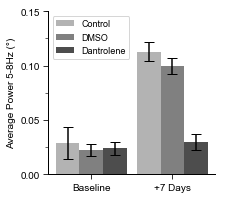

In [5]:
mat = sci.loadmat('emx-drug-bar.mat')

bar_input = mat['a']
ebars = mat['st']
bar_input = np.transpose(bar_input)
ebars = np.transpose(ebars)


N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
ind = ind*1.2
fig, ax = plt.subplots()
rects0 = ax.bar(ind, bar_input[0,:], width, color='0.7', yerr=ebars[0,:], capsize=5)
rects1 = ax.bar(ind + width, bar_input[1,:], width, color='0.5', yerr=ebars[1,:], capsize=5)
rects2 = ax.bar(ind + width*2, bar_input[2,:], width, color='0.3', yerr=ebars[1,:], capsize=5)
# add some text for labels, title and axes ticks
ax.set_ylabel('Average Power 5-8Hz (\xb0)')
ax.set_xticks(ind + (width*2) / 2)
ax.set_yticks([0,0.05,0.1,0.15])
ax.set_xticklabels(('Baseline', '+7 Days'))
ax.set_ylim(0,0.15)
ax.yaxis.set_minor_locator(minor_locator)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
fig = plt.gcf()
fig.set_size_inches(3,3)

ax.legend((rects0, rects1, rects2), ('Control', 'DMSO','Dantrolene'),fontsize = 9, loc = 'upper left')
plt.show()